## When binary classification is False

```
(Pdb) inputs.shape
torch.Size([3, 1, 80, 80, 80])
(Pdb) labels
tensor([1, 0, 1], device='cuda:0')
(Pdb) y
tensor([[-0.2780,  0.2306],
        [-0.3471,  0.2968],
        [-0.3351,  0.3481]], device='cuda:0', grad_fn=<SqueezeBackward1>)
(Pdb) self.loss(y, labels)
tensor(0.6486, device='cuda:0', grad_fn=<NllLossBackward0>)
```

## When binary classification is True
```
(Pdb) inputs.shape
torch.Size([3, 1, 80, 80, 80])
(Pdb) labels
tensor([1, 1, 0], device='cuda:0')
(Pdb) y
tensor([0.2587, 0.3700, 0.3581], device='cuda:0', grad_fn=<SqueezeBackward1>)[0.2587, 0.3700, 0.3581], device='cuda:0',
```


### Binary Classification  :https://nuguziii.github.io/dev/dev-002/ 여기보기 

In [1]:
import torch
from torch.nn import CrossEntropyLoss, MSELoss, BCEWithLogitsLoss

#batch size is 3 btw

labels = torch.tensor([1,0,1])

##binary classification False
loss = CrossEntropyLoss()
pred = torch.tensor([[-0.2780,  0.2306],
        [-0.3471,  0.2968],
        [-0.3351,  0.3481]])
#print(labels.dtype, pred.dtype)
print(labels.shape, pred.shape)
print(loss(pred, labels)) #label이 뒤로 가야함! 



##binary classificaiton True
loss = BCEWithLogitsLoss()
pred = torch.tensor([0.2587, 0.3700, 0.3581])

print(labels, pred)
print(loss(pred, labels))






torch.Size([3]) torch.Size([3, 2])
tensor(0.6486)
tensor([1, 0, 1]) tensor([0.2587, 0.3700, 0.3581])


RuntimeError: result type Float can't be cast to the desired output type Long

In [2]:
# Example of target with class indices
import torch.nn as nn 
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
print(input.shape, target.shape)
output = loss(input, target)

output.backward()
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output.backward()

torch.Size([3, 5]) torch.Size([3])


In [3]:
##trying binary classification
loss = nn.BCEWithLogitsLoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
output = loss(input, target)
output.backward()

In [4]:
input, target

(tensor([ 0.5846,  1.1956, -1.1039], requires_grad=True), tensor([0., 0., 1.]))

In [5]:
print(nn.Sigmoid()(input))

#same, as expected
print(nn.BCELoss()(nn.Sigmoid()(input),target))
print(nn.BCEWithLogitsLoss()(input, target))

tensor([0.6421, 0.7677, 0.2490], grad_fn=<SigmoidBackward0>)
tensor(1.2926, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.2926, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


## Cross entropy 공부 (not just binary):
https://medium.com/unpackai/cross-entropy-loss-in-ml-d9f22fc11fe0

i.e. if 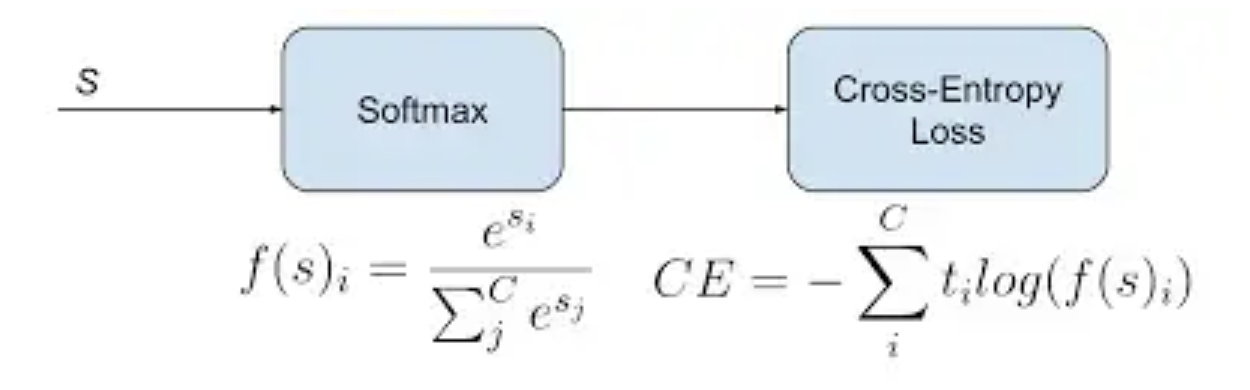


Therefore, if the softmaxed (sigmoided) value is zero or below, error would arise.

* Torch's `nn.CrossEntropyLoss()` already does softmax before doing it (which is why we should use `nn.BCEWithLogitsLoss()`!!





### therefore, in the case of Binary classification

#### First, (multi-label) softmax => (binary) sigmoid

if we assume that Binary classification is the same as a two-neuron thing, but with one neuron's weights all zero, therefore
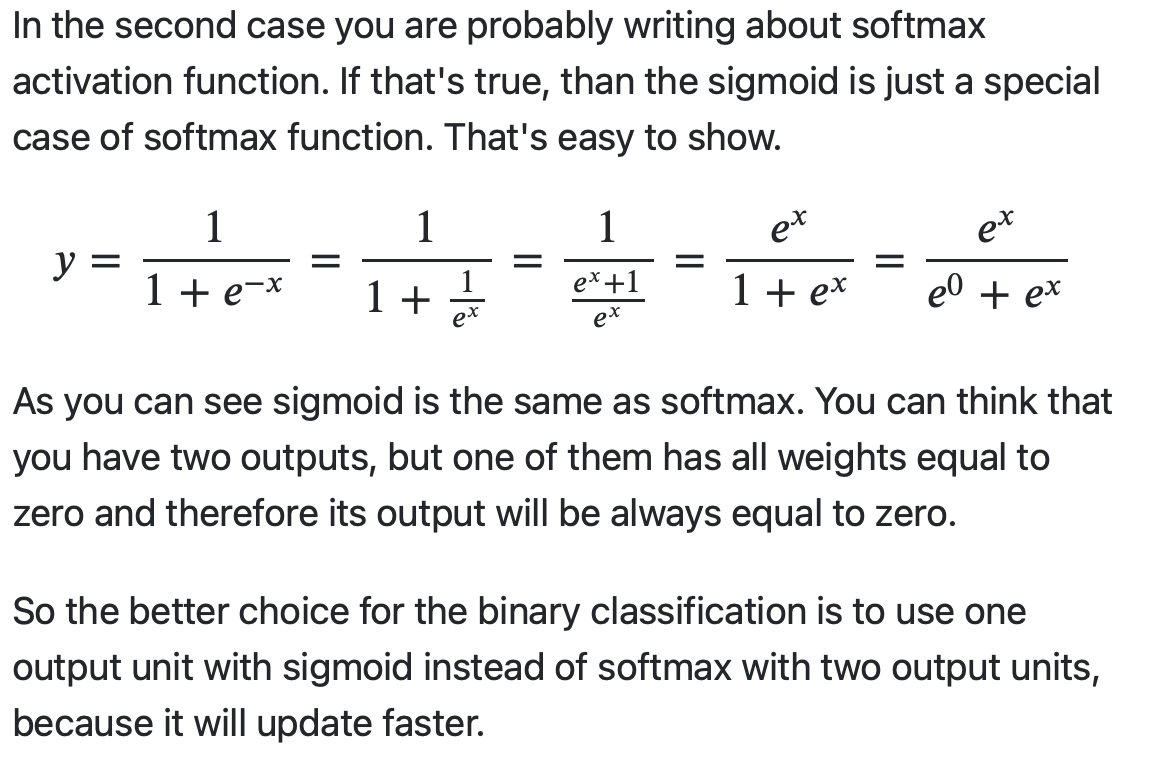
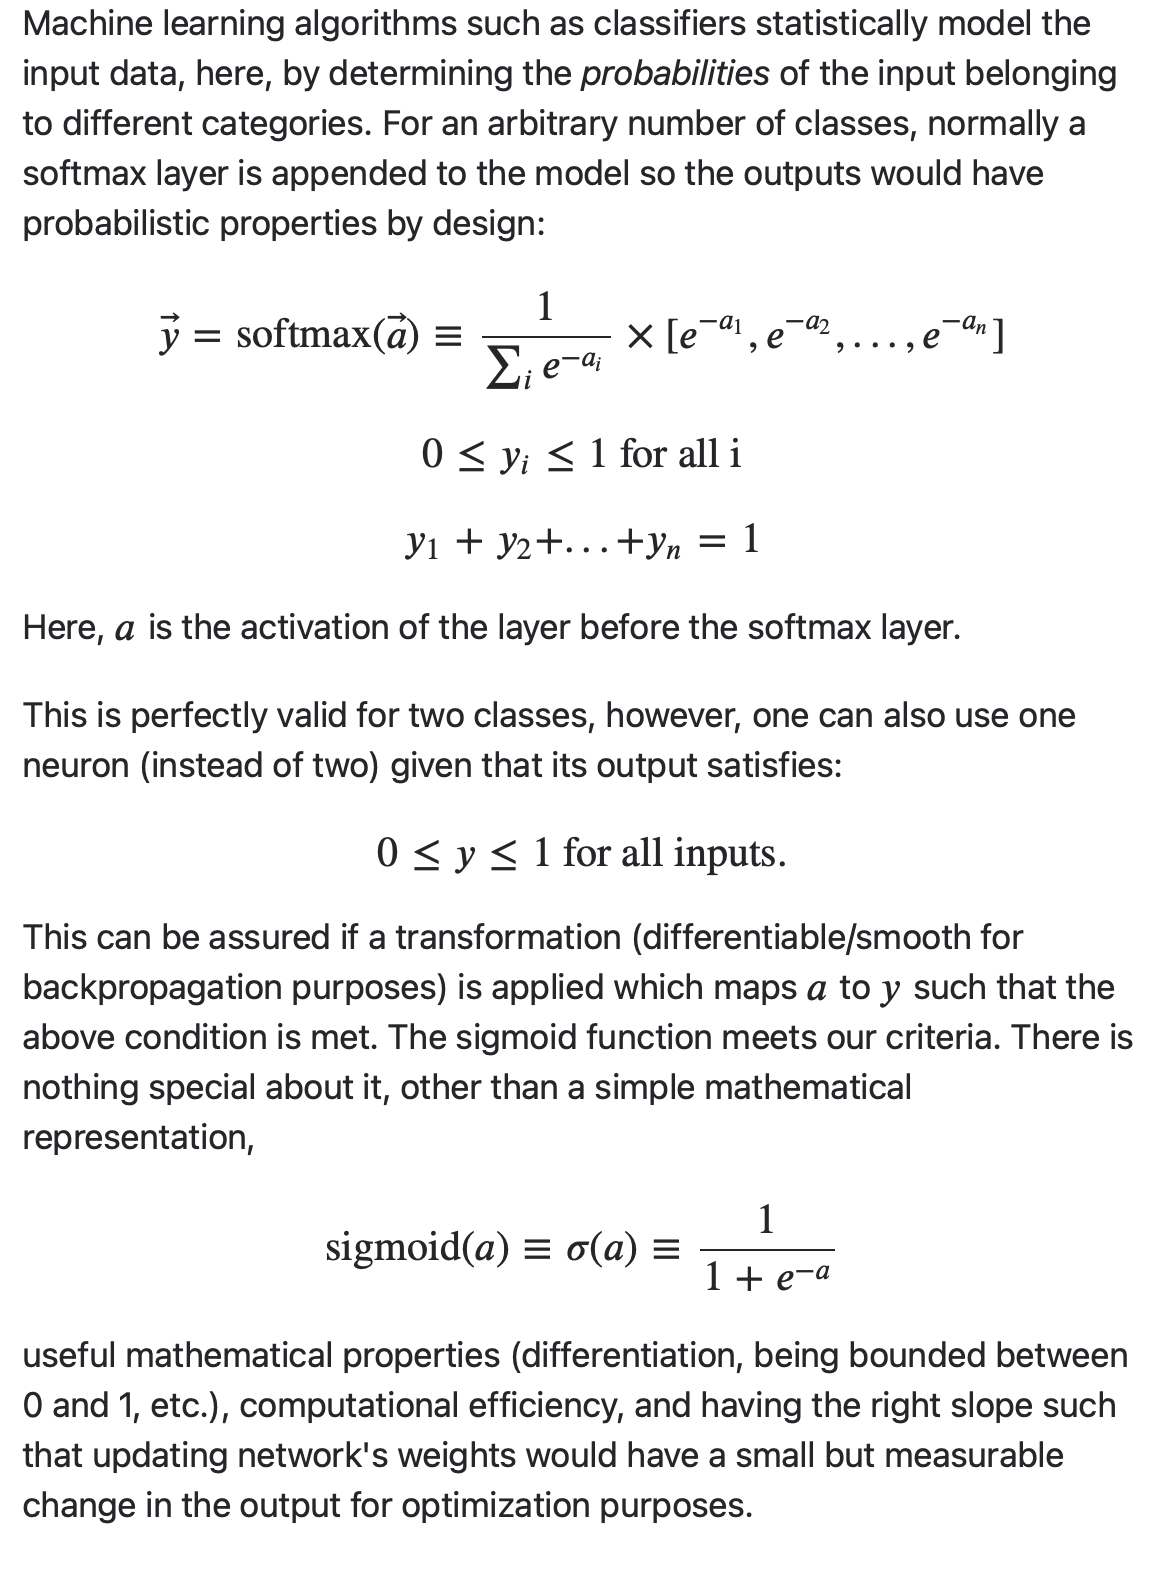





#### second, (multi-label) CrossEntropyLoss  => BCE Loss (유도하기)

#### Cross Entropy Loss
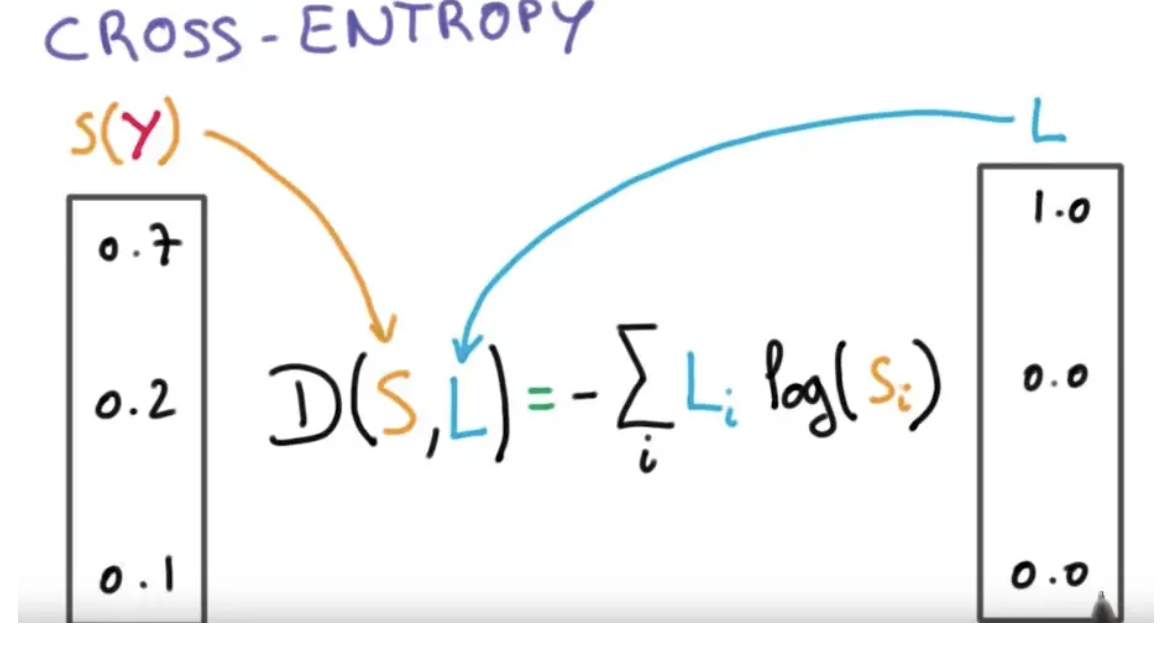

#### BCEloss (Binary Cross Entropy Loss) : https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

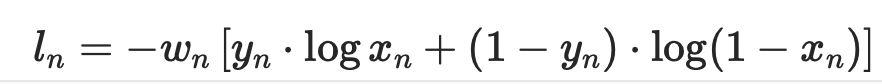

(later, mean is taken as default reduction is mean, which is also the case for CrossEntropyLoss)

유도 : there are two possible cases, True (y = 1) or False (y = 0). Also, there's only one pred value, x (i.e. corresponding to s_i in the crossentropy loss)

therefore, given x and y => there is
* prob of x that y is true
* prob of 1-x that 1-y is true

=> therefore, these two classes can be used to get cross entropy loss (equation above) (w : just reudction using mean, which is also used in CrossEntropyLoss)

#### 결론
* therefore, (softmax => cross entropy loss) = (sigmoid => BCEloss) 
* 주의하기 : if x = 0 or 1, nan 으로 diverge => torch에서 알아서 cutting한다고 함 (어차피 sigmoid할 것이기때문에, 0,1 로 가지는 않을듯?)
* 아 그리고 그 CrossEntropyLoss에서는 one-hot여부에 따라 다르게 해줄 수 있었는데, 여기서는 그럴 필요가없는게 애초에 one-dim이다 (i.e. for each sample target is either 0 or 1, not [0,1] or [1,0])
    * **이것때문에, 밑에서 보듯이, target이 float가 되도록 해야하는 듯 !?**
    * yes, also because sometimes the probability shouldn't be only zero or 1 (https://github.com/pytorch/pytorch/issues/2220) 


In [88]:
loss = nn.BCEWithLogitsLoss()
input = torch.randn(3, requires_grad=True) #non-sigmoided thing!
target = torch.empty(3).random_(2)
output = loss(input, target)
output.backward()

In [86]:
input , target, output
print("target has to be float, not int!!")

(tensor([-0.0739, -0.3035,  0.1366], requires_grad=True),
 tensor([0., 0., 0.]),
 tensor(0.6578, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>))

In [96]:
#loss(input, torch.tensor([0,0,0])) #raises error 

In [94]:
target

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [95]:
output

tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000]])

#### HAHA

In [74]:
##setting new input and trying 
nn.BCEWithLogitsLoss()(torch.tensor([0.05,0.005,0.02]),
                       torch.tensor([0.,0.,0.]))

tensor(0.7058)

In [75]:
nn.BCEWithLogitsLoss()(torch.tensor([0.00005,0.00005,0.00005]),
                       torch.tensor([0.,0.,0.]))

tensor(0.6932)

In [58]:
nn.BCEWithLogitsLoss()(torch.tensor([1.,1.,1.]),
                       torch.tensor([0.,0.,0.]))

tensor(1.3133)

In [57]:
nn.BCEWithLogitsLoss()(torch.tensor([0.05,0.005,0.02]),
                       torch.tensor([1.,1.,1.]))

tensor(0.6808)

In [61]:
input, target

(tensor([0.8691, 0.0099, 1.1943], requires_grad=True), tensor([1., 0., 1.]))

In [76]:
torch.sum(target*torch.log10(input))

tensor(nan, grad_fn=<SumBackward0>)

In [79]:
target*torch.log10(nn.Sigmoid()(input))
# if input contains 0, log zero goes to infinity

tensor([-0.0000, -0.2170, -0.0000], grad_fn=<MulBackward0>)

In [83]:
nn.Sigmoid()(input)

tensor([0.4208, 0.6067, 0.8288], grad_fn=<SigmoidBackward0>)